# Baseline Model

In [44]:
# libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [45]:
data = pd.read_csv('Cleaned-Bank.csv')

In [46]:
data

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,Services,Married,Secondary,No,-333,Yes,No,Cellular,30,Jul,329,5,-1,0,Unknown,No
4517,57,Self-employed,Married,Tertiary,Yes,-3313,Yes,Yes,Unknown,9,May,153,1,-1,0,Unknown,No
4518,57,Technician,Married,Secondary,No,295,No,No,Cellular,19,Aug,151,11,-1,0,Unknown,No
4519,28,Blue-collar,Married,Secondary,No,1137,No,No,Cellular,6,Feb,129,4,211,3,Other,No


In [47]:
# range

min_value = data['Pdays'].min()
max_value = data['Pdays'].max()
print(f"Range: {min_value} to {max_value}")

Range: -1 to 871


In [48]:
# distribution

data['Pdays'].describe()

,Pdays
count,4521.000000
mean,39.766645
std,100.121124
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,-1.000000
max,871.000000


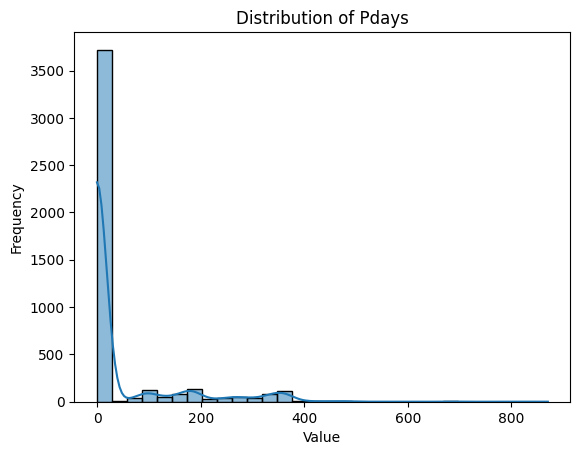

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Pdays'], kde=True, bins=30)
plt.title('Distribution of Pdays')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [50]:
value_counts_num = data['Pdays'].value_counts().sort_index()
print(value_counts_num)

Pdays
-1      3705
 1         2
 2         7
 3         1
 5         1
        ... 
 687       1
 761       1
 804       1
 808       1
 871       1
Name: count, Length: 292, dtype: int64


In [51]:
# balance featire

# range

min_value = data['Balance'].min()
max_value = data['Balance'].max()
print(f"Range: {min_value} to {max_value}")

Range: -3313 to 71188


In [52]:
# distribution

# distribution

data['Balance'].describe()

,Balance
count,4521.000000
mean,1422.657819
std,3009.638142
min,-3313.000000
25%,69.000000
50%,444.000000
75%,1480.000000
max,71188.000000


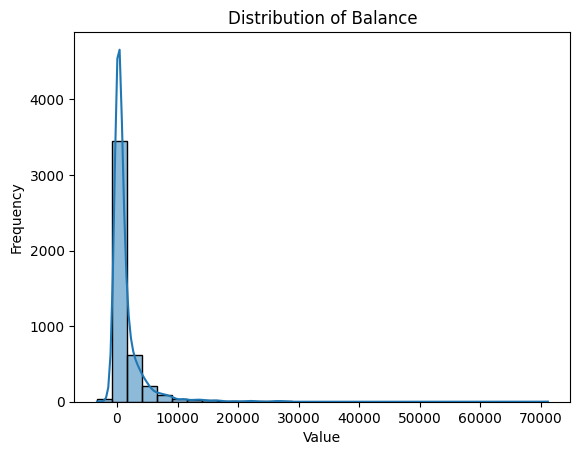

In [53]:
# Distribution

sns.histplot(data['Balance'], kde=True, bins=30)
plt.title('Distribution of Balance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [54]:
value_counts_num = data['Balance'].value_counts().sort_index()
print(value_counts_num)

Balance
-3313     1
-2082     1
-1746     1
-1680     1
-1400     1
         ..
 27069    1
 27359    1
 27733    1
 42045    1
 71188    1
Name: count, Length: 2353, dtype: int64


In [55]:
data

,Age,Job,Marital,Education,Default,Balance,Housing,Loan,Contact,Day,Month,Duration,Campaign,Pdays,Previous,Poutcome,Y
0,30,Unemployed,Married,Primary,No,1787,No,No,Cellular,19,Oct,79,1,-1,0,Unknown,No
1,33,Services,Married,Secondary,No,4789,Yes,Yes,Cellular,11,May,220,1,339,4,Failure,No
2,35,Management,Single,Tertiary,No,1350,Yes,No,Cellular,16,Apr,185,1,330,1,Failure,No
3,30,Management,Married,Tertiary,No,1476,Yes,Yes,Unknown,3,Jun,199,4,-1,0,Unknown,No
4,59,Blue-collar,Married,Secondary,No,0,Yes,No,Unknown,5,May,226,1,-1,0,Unknown,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,Services,Married,Secondary,No,-333,Yes,No,Cellular,30,Jul,329,5,-1,0,Unknown,No
4517,57,Self-employed,Married,Tertiary,Yes,-3313,Yes,Yes,Unknown,9,May,153,1,-1,0,Unknown,No
4518,57,Technician,Married,Secondary,No,295,No,No,Cellular,19,Aug,151,11,-1,0,Unknown,No
4519,28,Blue-collar,Married,Secondary,No,1137,No,No,Cellular,6,Feb,129,4,211,3,Other,No


In [56]:
# take a selected amount of features

selected_features = ['Age', 'Balance', 'Pdays', 'Poutcome', 'Housing', 'Marital', 'Education', 'Month', 'Contact']  # replace with your actual features
target_column = 'Y'  # replace with your actual target

# Create a new variable for modeling
model_data = data[selected_features + [target_column]].copy()

In [57]:
model_data

,Age,Balance,Pdays,Poutcome,Housing,Marital,Education,Month,Contact,Y
0,30,1787,-1,Unknown,No,Married,Primary,Oct,Cellular,No
1,33,4789,339,Failure,Yes,Married,Secondary,May,Cellular,No
2,35,1350,330,Failure,Yes,Single,Tertiary,Apr,Cellular,No
3,30,1476,-1,Unknown,Yes,Married,Tertiary,Jun,Unknown,No
4,59,0,-1,Unknown,Yes,Married,Secondary,May,Unknown,No
...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,-1,Unknown,Yes,Married,Secondary,Jul,Cellular,No
4517,57,-3313,-1,Unknown,Yes,Married,Tertiary,May,Unknown,No
4518,57,295,-1,Unknown,No,Married,Secondary,Aug,Cellular,No
4519,28,1137,211,Other,No,Married,Secondary,Feb,Cellular,No


In [58]:
model_data['Education'].value_counts()

,count
Education,
Secondary,2306
Tertiary,1350
Primary,678
Unknown,187


In [59]:
# encoding

# Step 2a: One-hot encoding
model_data = pd.get_dummies(model_data, columns=['Poutcome', 'Housing', 'Marital', 'Contact'], drop_first=True)

# Step 2b: Ordinal encoding for Education
education_order = {'Unknown': 0, 'Primary': 1, 'Secondary': 2, 'Tertiary': 3}
model_data['Education'] = model_data['Education'].map(education_order)

# Step 2c: Frequency encoding for Month
month_freq = model_data['Month'].value_counts(normalize=True)
model_data['Month'] = model_data['Month'].map(month_freq)

model_data['Y'] = model_data['Y'].map({'Yes': 1, 'No': 0})


In [60]:
model_data

,Age,Balance,Pdays,Education,Month,Y,Poutcome_Other,Poutcome_Success,Poutcome_Unknown,Housing_Yes,Marital_Married,Marital_Single,Contact_Telephone,Contact_Unknown
0,30,1787,-1,1,0.017695,0,False,False,True,False,True,False,False,False
1,33,4789,339,2,0.309224,0,False,False,False,True,True,False,False,False
2,35,1350,330,3,0.064809,0,False,False,False,True,False,True,False,False
3,30,1476,-1,3,0.117452,0,False,False,True,True,True,False,False,True
4,59,0,-1,2,0.309224,0,False,False,True,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,-1,2,0.156160,0,False,False,True,True,True,False,False,False
4517,57,-3313,-1,3,0.309224,0,False,False,True,True,True,False,False,True
4518,57,295,-1,2,0.140013,0,False,False,True,False,True,False,False,False
4519,28,1137,211,2,0.049104,0,True,False,False,False,True,False,False,False


In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Features and target
X = model_data.drop('Y', axis=1)
y = model_data['Y']

# Train-test split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [62]:
# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]  # for ROC-AUC


In [63]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.89      1201
           1       0.22      0.28      0.25       156

    accuracy                           0.81      1357
   macro avg       0.56      0.58      0.57      1357
weighted avg       0.83      0.81      0.81      1357

Confusion Matrix:
 [[1049  152]
 [ 112   44]]
ROC AUC Score: 0.5778624650398172


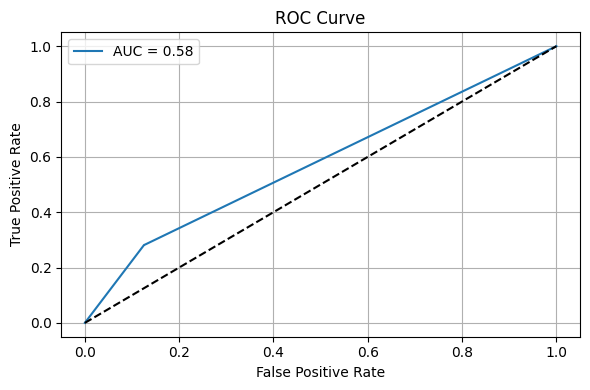

In [64]:
# Optional: ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Balance data


In [65]:
from imblearn.over_sampling import SMOTE

# Split before SMOTE to avoid data leakage
X = model_data.drop('Y', axis=1)
y = model_data['Y']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Original class distribution:\n", y_train.value_counts())
print("After SMOTE class distribution:\n", pd.Series(y_train_bal).value_counts())


Original class distribution:
 Y
0    2799
1     365
Name: count, dtype: int64
After SMOTE class distribution:
 Y
0    2799
1    2799
Name: count, dtype: int64


In [66]:
# Train model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train_bal, y_train_bal)

# Evaluate
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1201
           1       0.31      0.36      0.33       156

    accuracy                           0.83      1357
   macro avg       0.61      0.63      0.62      1357
weighted avg       0.85      0.83      0.84      1357

Confusion Matrix:
 [[1076  125]
 [ 100   56]]
ROC AUC Score: 0.6271803411686843


In [67]:
print("Tree Depth:", clf.get_depth())
print("Number of Leaves:", clf.get_n_leaves())
print("Feature Importances:")
for name, score in zip(X_train.columns, clf.feature_importances_):
    print(f"{name}: {score:.4f}")


Tree Depth: 33
Number of Leaves: 531
Feature Importances:
Age: 0.0679
Balance: 0.1343
Pdays: 0.0323
Education: 0.0197
Month: 0.5420
Poutcome_Other: 0.0036
Poutcome_Success: 0.1406
Poutcome_Unknown: 0.0009
Housing_Yes: 0.0168
Marital_Married: 0.0213
Marital_Single: 0.0082
Contact_Telephone: 0.0024
Contact_Unknown: 0.0099


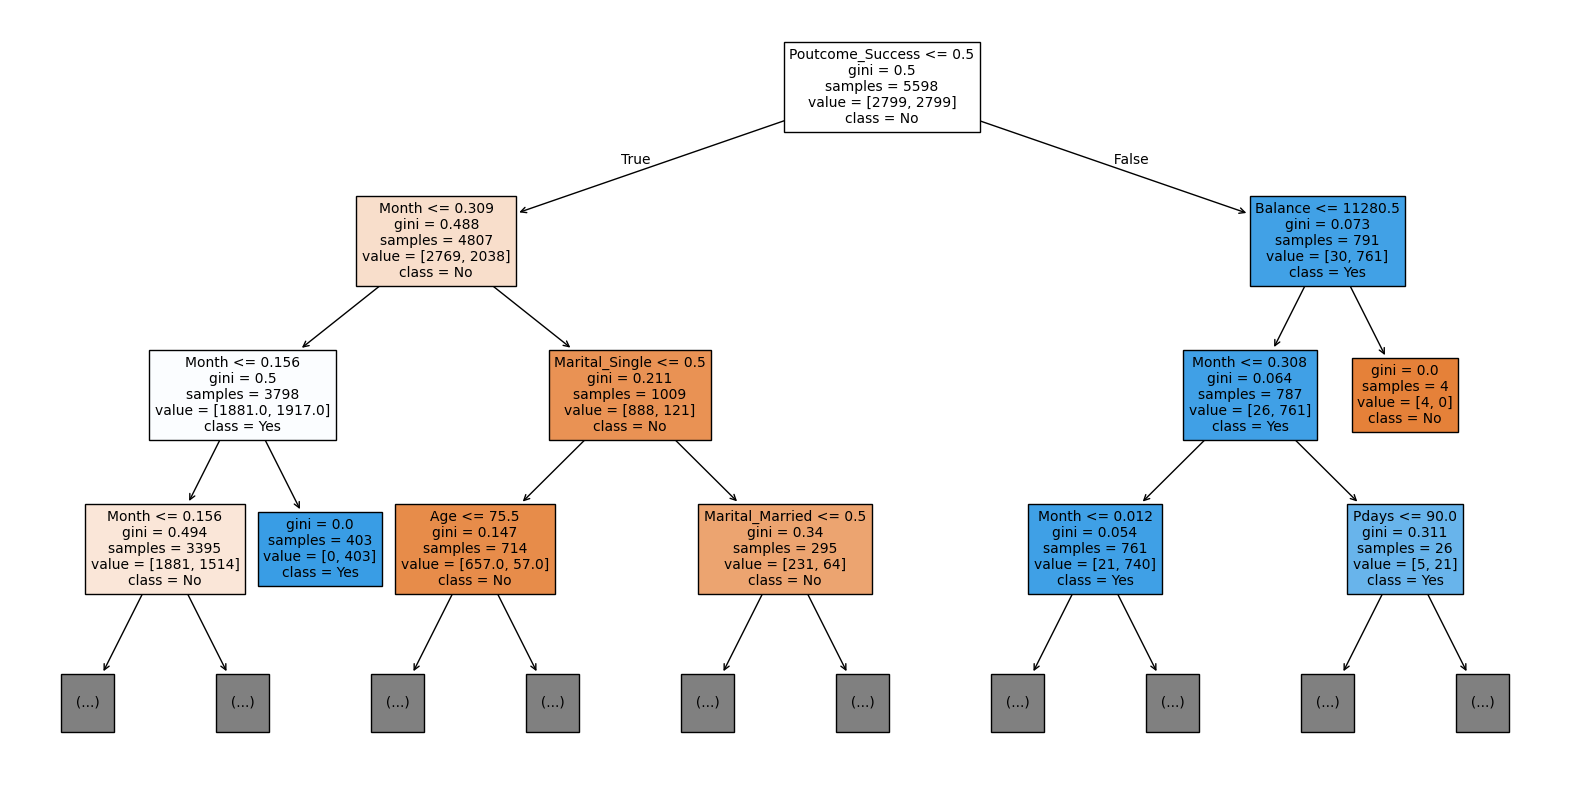

In [68]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(clf,
          feature_names=X_train.columns,
          class_names=["No", "Yes"],
          filled=True,
          max_depth=3,  # just show top 3 levels
          fontsize=10)
plt.show()


# New Model

In [69]:
pip install xgboost

In [70]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Create and train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_bal, y_train_bal)

# Predict
y_pred_xgb = xgb.predict(X_test)
y_prob_xgb = xgb.predict_proba(X_test)[:, 1]

# Evaluate
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:02:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93      1201
           1       0.41      0.22      0.29       156

    accuracy                           0.87      1357
   macro avg       0.66      0.59      0.61      1357
weighted avg       0.85      0.87      0.86      1357

Confusion Matrix:
 [[1150   51]
 [ 121   35]]
ROC AUC Score: 0.6492132624522299


## New Model

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
rf = RandomForestClassifier(n_estimators=100,
                            class_weight='balanced',
                            random_state=42)

# Train on SMOTE-balanced data
rf.fit(X_train_bal, y_train_bal)

# Predict
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]


In [72]:
# Evaluation
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92      1201
           1       0.36      0.24      0.29       156

    accuracy                           0.86      1357
   macro avg       0.63      0.59      0.61      1357
weighted avg       0.84      0.86      0.85      1357

Confusion Matrix:
 [[1133   68]
 [ 118   38]]
ROC AUC Score: 0.6910854202694335


## hyper-parameter tuning

In [73]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'class_weight': ['balanced']
}

rf_model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf_model, param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_bal, y_train_bal)

# Best model
best_rf = grid_search.best_estimator_
print("Best Hyperparameters:\n", grid_search.best_params_)


Best Hyperparameters:
 {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [74]:
# Predict and evaluate
y_pred_best_rf = best_rf.predict(X_test)
y_prob_best_rf = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_best_rf))


Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92      1201
           1       0.35      0.23      0.28       156

    accuracy                           0.86      1357
   macro avg       0.63      0.59      0.60      1357
weighted avg       0.84      0.86      0.85      1357

Confusion Matrix:
 [[1135   66]
 [ 120   36]]
ROC AUC Score: 0.6960358888960054


## threshold tuning

In [75]:
y_probs = best_rf.predict_proba(X_test)[:, 1]  # Probability for class 1

In [76]:
from sklearn.metrics import f1_score
import numpy as np

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = []

for t in thresholds:
    y_pred_thresh = (y_probs >= t).astype(int)
    score = f1_score(y_test, y_pred_thresh)
    f1_scores.append(score)

best_t_index = np.argmax(f1_scores)
best_threshold = thresholds[best_t_index]
print(f"Best threshold: {best_threshold:.2f} with F1 score: {f1_scores[best_t_index]:.4f}")


Best threshold: 0.40 with F1 score: 0.3232


In [77]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred_final = (y_probs >= best_threshold).astype(int)

print("Threshold Tuned RF Report:\n", classification_report(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))


Threshold Tuned RF Report:
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1201
           1       0.31      0.34      0.32       156

    accuracy                           0.84      1357
   macro avg       0.61      0.62      0.62      1357
weighted avg       0.84      0.84      0.84      1357

Confusion Matrix:
 [[1082  119]
 [ 103   53]]
ROC AUC Score: 0.6960358888960054


## Ensemble

In [78]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define base models
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=7, random_state=42)
rf_clf = best_rf  # your tuned Random Forest

# Create ensemble
ensemble_clf = VotingClassifier(
    estimators=[('lr', log_reg), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# Fit on training data
ensemble_clf.fit(X_train, y_train)

# Predict and evaluate
y_probs_ensemble = ensemble_clf.predict_proba(X_test)[:, 1]
y_pred_ensemble = (y_probs_ensemble >= 0.40).astype(int)  # same threshold as before

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

print("Ensemble Model Report:\n", classification_report(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs_ensemble))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:53:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Ensemble Model Report:
               precision    recall  f1-score   support

           0       0.92      0.89      0.90      1201
           1       0.31      0.37      0.33       156

    accuracy                           0.83      1357
   macro avg       0.61      0.63      0.62      1357
weighted avg       0.85      0.83      0.84      1357

Confusion Matrix:
 [[1073  128]
 [  99   57]]
ROC AUC Score: 0.7108819573432396
